In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('/content/heart-1.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df['sex'].unique()

array([1, 0])

In [ ]:
df[df['sex']==1]['sex'].count()

207

In [ ]:
df[df['sex']==0]['sex'].count()

96

In [ ]:
df[(df['sex']==0)&(df['age']>50)].count()

,0
age,69
sex,69
cp,69
trestbps,69
chol,69
fbs,69
restecg,69
thalach,69
exang,69
oldpeak,69


In [ ]:
df[df['chol']>300]['chol'].count()

43

In [ ]:
df[df['thal']==2]['thal'].count()

166

In [ ]:
df[df['target']==1]['target'].count()

165

In [ ]:
df.duplicated().sum()

1

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[(df['sex']==0)&(df['target']==1)].count()

,0
age,72
sex,72
cp,72
trestbps,72
chol,72
fbs,72
restecg,72
thalach,72
exang,72
oldpeak,72


In [ ]:
df[(df['sex']==1)&(df['target']==1)].count()

,0
age,92
sex,92
cp,92
trestbps,92
chol,92
fbs,92
restecg,92
thalach,92
exang,92
oldpeak,92


In [ ]:
df.shape

(302, 14)

In [ ]:
df['cp'].unique()

array([3, 2, 1, 0])

In [ ]:
df[(df['target']==0)&(df['cp']==3)].count()

,0
age,7
sex,7
cp,7
trestbps,7
chol,7
fbs,7
restecg,7
thalach,7
exang,7
oldpeak,7


In [ ]:
df[df['target']==1]['cp'].value_counts()

,count
cp,
2,68
1,41
0,39
3,16


In [ ]:
df['cp'].value_counts()

,count
cp,
0,143
2,86
1,50
3,23


Text(0.5, 1.0, 'Age Distribution')

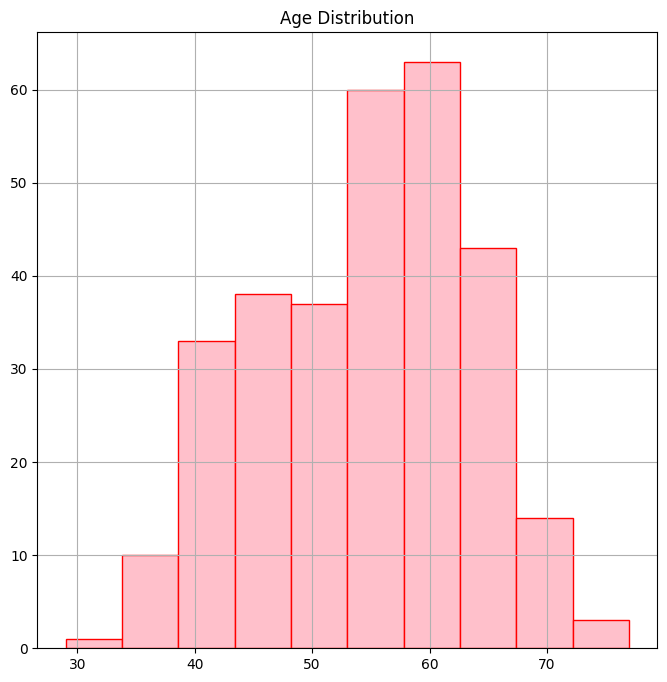

In [ ]:
df['age'].hist(grid=True,bins=10,color='pink',edgecolor='red')
plt.title('Age Distribution')

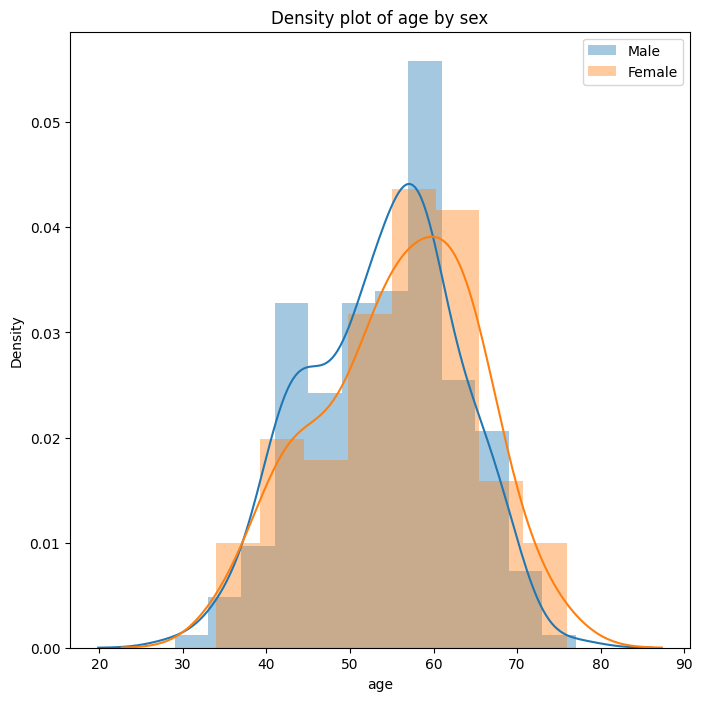

In [ ]:
sns.distplot(df[df['sex']==1]['age'],label='Male')
sns.distplot(df[df['sex']==0]['age'],label='Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Text(0.5, 1.0, 'Resting Blood Pressure Distriution')

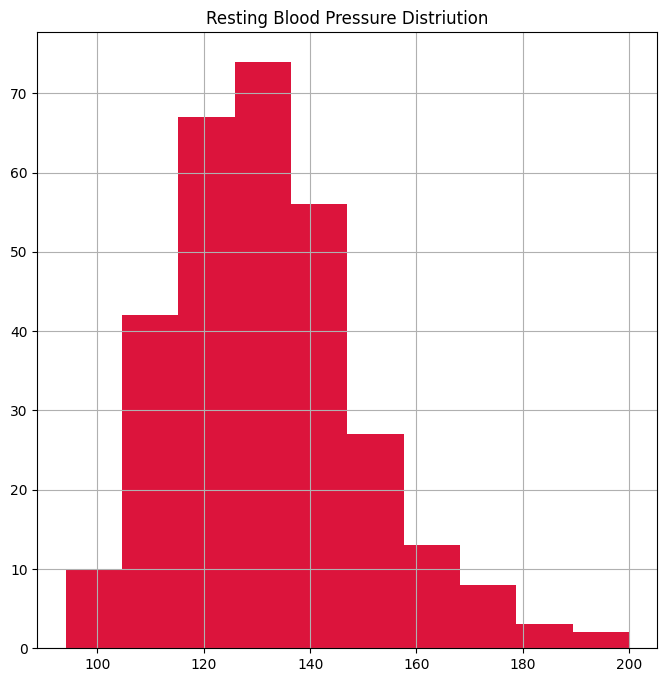

In [ ]:
df['trestbps'].hist(color='crimson')
plt.title('Resting Blood Pressure Distriution')

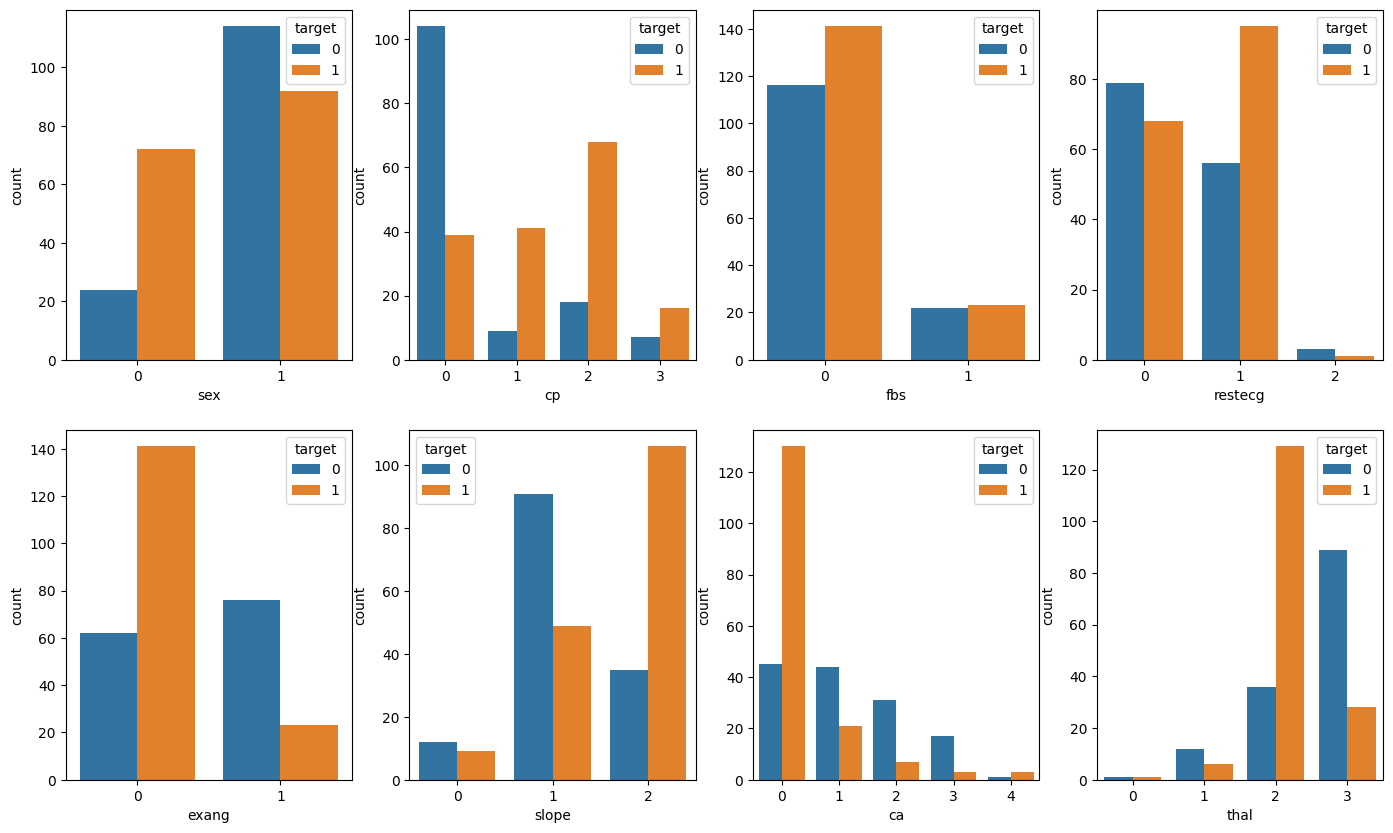

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for i, feat in enumerate(cat_feat):
  if feat != 'target':
    ax = axes[int(i/4),i%4]
    sns.countplot(x=feat, hue='target', data=df, ax=ax)

<Axes: >

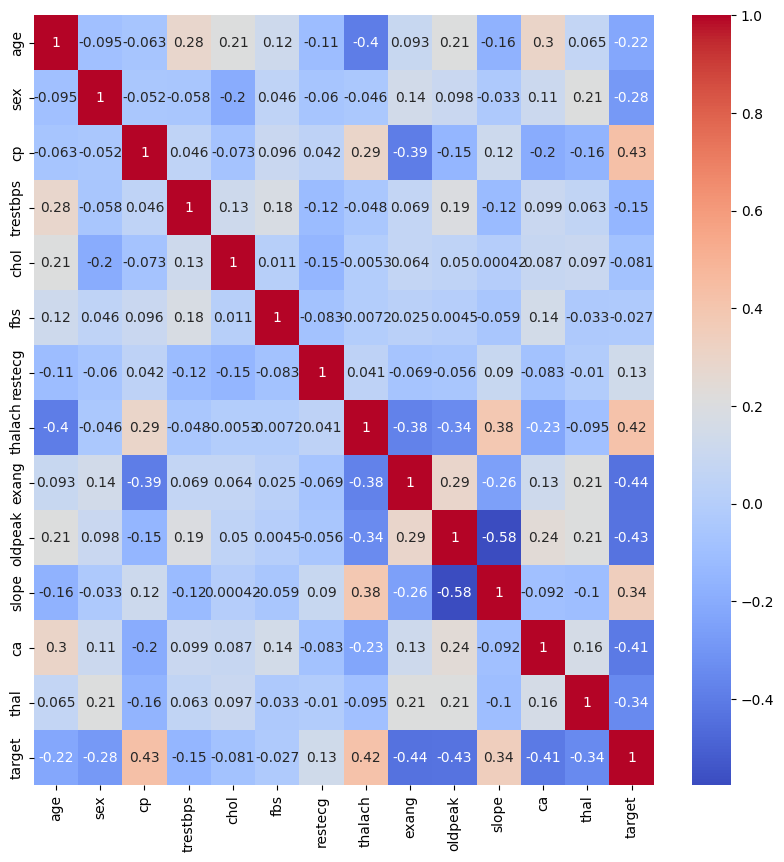

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

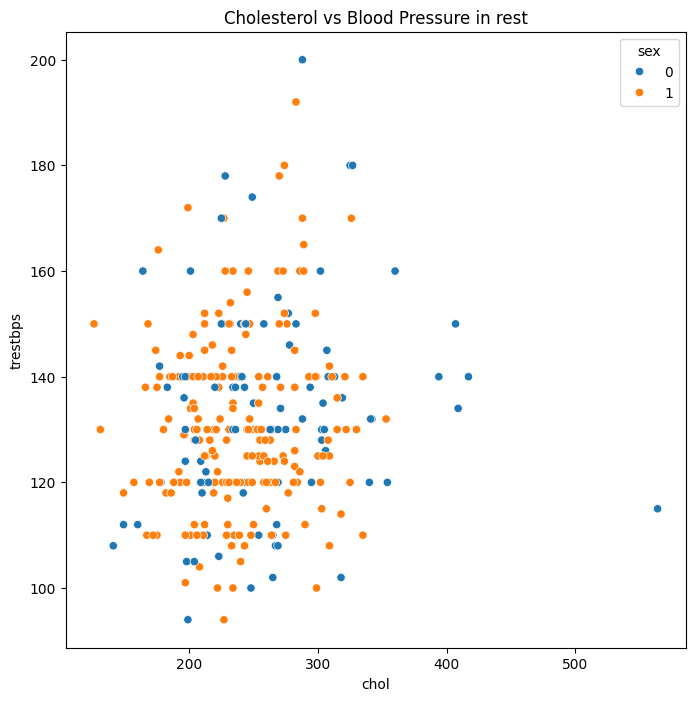

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None , data=df)
plt.title('Cholesterol vs Blood Pressure in rest')
plt.show()

In [ ]:
x=df.drop(columns=['target'])
y=df['target']
print(x.shape)
print(y.shape)

(302, 13)
(302,)


In [ ]:
from re import X
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


In [ ]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
ytrainpred=clf.predict(x_train)
ytestpred=clf.predict(x_test)

In [ ]:
ytrainpred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
ytestpred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
def plot_confusionmatrix(ytrainpred,y_train,dom):
  print(f'{dom}confusion matrix')
  cf=confusion_matrix(ytrainpred,y_train)
  sns.heatmap(cf,annot=True,cmap='Blues',fmt='g')
  plt.tight_layout()
  plt.show()

In [ ]:
print(f'train score{accuracy_score(y_train,ytrainpred)}')
print(f'test score{accuracy_score(y_test,ytestpred)}')

train score1.0
test score0.8032786885245902


trainconfusion matrix


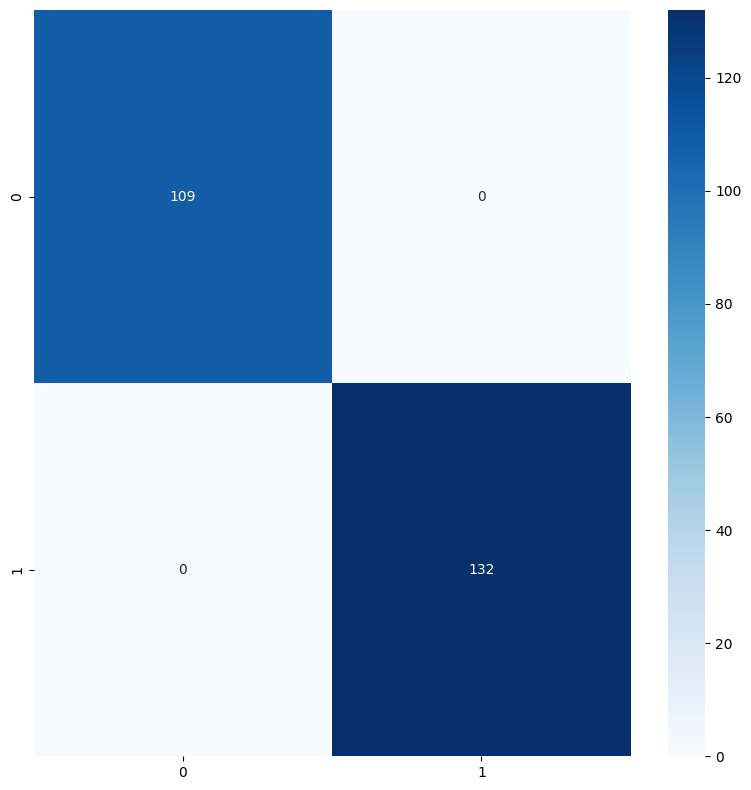

testconfusion matrix


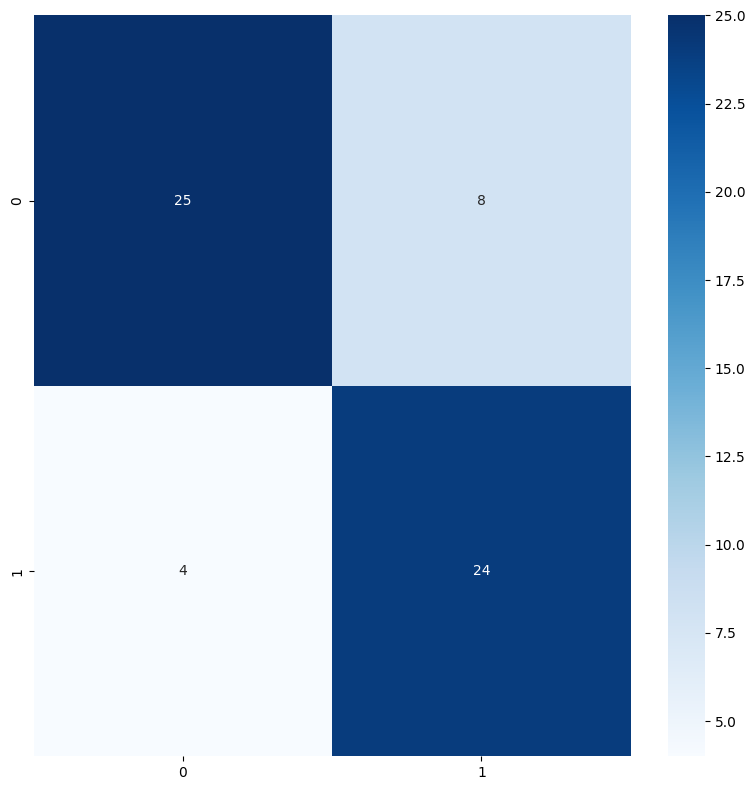

In [ ]:
plot_confusionmatrix(ytrainpred,y_train,dom='train')
plot_confusionmatrix(ytestpred,y_test,dom='test')

In [ ]:
c_parameter_name='max_depth'
c_parameter_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df=[]
for input_parameter in c_parameter_values:
  model=tree.DecisionTreeClassifier(max_depth=input_parameter,splitter='best')
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc_score=accuracy_score(y_test,y_pred)*100
  df.append({c_parameter_name:input_parameter,'accuracy':acc_score})
data=pd.DataFrame(df)
print(data)
print('')

    max_depth   accuracy
0           1  72.131148
1           2  73.770492
2           3  78.688525
3           4  80.327869
4           5  80.327869
5           6  80.327869
6           7  77.049180
7           8  77.049180
8           9  77.049180
9          10  78.688525
10         11  78.688525
11         12  78.688525
12         13  77.049180
13         14  78.688525
14         15  77.049180



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ytestpred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

